In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv(r"C:\Users\anoop\Downloads\lung_cancer1.csv.csv")  

In [15]:
data = data.replace({'YES': 2, 'NO': 1})
data = data.replace({'M': 2, 'F': 1})

In [16]:
data.drop(['LUNG_CANCER'],axis=1,inplace=True)

In [17]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [18]:
x = data.iloc[:,[3,4]].values
x

array([[2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 1],
       [2, 1],
       [1, 1],
       [2, 2],
       [1, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 1],
       [2, 1],
       [1, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 1],
       [2, 2],
       [2, 1],
       [2, 1],
       [1, 2],
       [1, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [2, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [2, 1],
       [2, 2],
       [2, 1],
       [1, 2],
       [2, 1],
       [2, 2],
       [2,

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anoop\AppData\Local\Temp\ipykernel_7052\939934258.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\anoop\AppData\Local\Temp\ipykernel_7052\939934258.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\anoop\AppData\Local\Temp\ipykernel_7052\939934258.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\anoop\AppData\Local\Temp\ipykernel_7052\939934258.py:5: ConvergenceWarning: Number

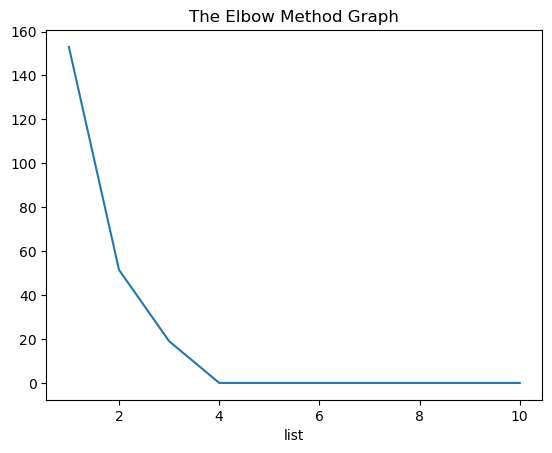

In [19]:
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11), list1)
plt.title('The Elbow Method Graph')
plt.xlabel('list')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


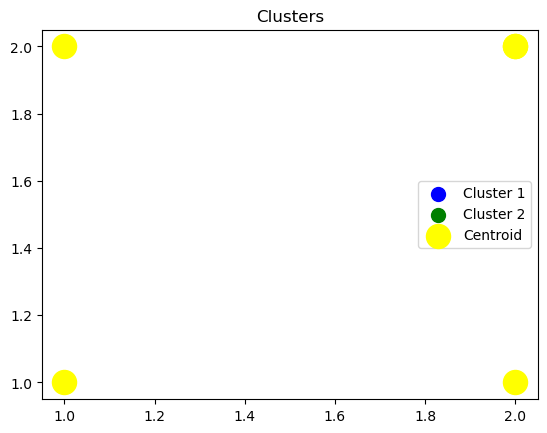

In [22]:
plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s = 100, c = 'blue', label='Cluster 1')
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s = 100, c = 'green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroid')
plt.title('Clusters')
plt.legend()
plt.show()